In [1]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None 

In [2]:
fred_api_key = 'your_api_key'

In [3]:
data = yf.download('^GSPC', start='2000-01-01', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-05-18,4157.680176,4202.200195,4153.500000,4198.049805,4198.049805,3980500000
2023-05-19,4204.149902,4212.910156,4180.200195,4191.979980,4191.979980,4041900000
2023-05-22,4190.779785,4209.220215,4179.680176,4192.629883,4192.629883,3728520000


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5.886000e+03
mean,1910.134950,1921.547289,1897.779209,1910.362769,1910.362769,3.312607e+09
std,997.321079,1002.545614,991.657133,997.472177,997.472177,1.521000e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1187.534973,1193.882446,1179.514984,1187.357452,1187.357452,2.011448e+09
50%,1441.539978,1452.070007,1432.525024,1441.534973,1441.534973,3.422930e+09
75%,2437.722534,2449.287537,2428.602478,2438.802490,2438.802490,4.163585e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [6]:
data.shape

(5886, 6)

In [7]:
del data['Open']
del data['High']
del data['Low']
del data['Adj Close']
del data['Volume']

<Axes: xlabel='Date'>

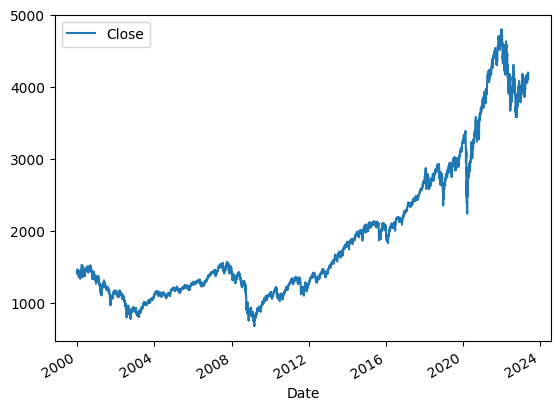

In [8]:
data.plot.line(y='Close', use_index=True)

In [9]:
def exponential_smooth(data, alpha):
    return data.ewm(alpha=alpha).mean()

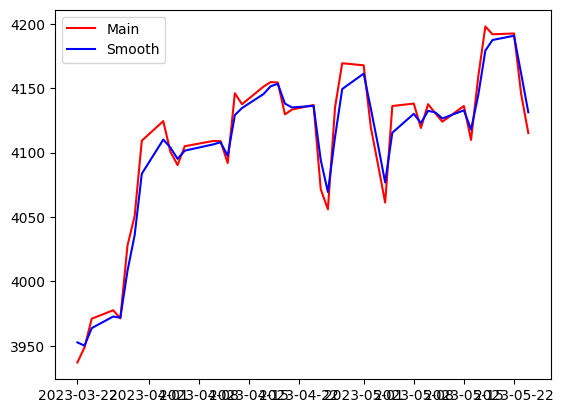

In [10]:
plt.plot(data['Close'][-45:], color='red', label='Main')
data = exponential_smooth(data, 0.65)
plt.plot(data['Close'][-45:], color='blue', label='Smooth')
plt.legend()
plt.show()

In [11]:
data['Previous'] = data['Close'].shift(1)
data['Tomorrow'] = data['Close'].shift(-1)
data['Diff'] = data['Previous'] - data['Close']
data['Target'] = (data['Tomorrow'] > data['Close']).astype(int)
data['US1Y'] = web.DataReader('DGS1', 'fred', start='2000-01-01', api_key=fred_api_key)
data['EURUSD'] = web.DataReader('DEXUSEU', 'fred', start='2000-01-01', api_key=fred_api_key) 
data['UNRATE'] = web.DataReader('UNRATE', 'fred', start='2000-01-01', api_key=fred_api_key)
data['OIL'] = yf.download('CL=F', start='2000-01-01', interval='1d')['Close']
data['GOLD'] = yf.download('GC=F', start='2000-01-01', interval='1d')['Close']
data['VIX'] = yf.download('^VIX', start='2000-01-01', interval='1d')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
data["UNRATE"].fillna(method='ffill', inplace=True)
data = data.dropna(subset=data.columns[data.columns != "Tomorrow"])

In [13]:
data

,Close,Previous,Tomorrow,Diff,Target,US1Y,EURUSD,UNRATE,OIL,GOLD,VIX
Date,,,,,,,,,,,
2000-08-30,1505.320795,1510.392334,1513.354313,5.071539,1,6.25,0.8924,4.1,33.400002,273.899994,17.690001
2000-08-31,1513.354313,1505.320795,1518.174522,-8.033518,1,6.22,0.8878,4.1,33.099998,278.299988,16.840000
2000-09-01,1518.174522,1513.354313,1510.963054,-4.820209,0,6.18,0.8993,3.9,33.380001,277.000000,17.530001
2000-09-05,1510.963054,1518.174522,1498.799569,7.211468,0,6.18,0.8876,3.9,33.799999,275.799988,19.820000
2000-09-06,1498.799569,1510.963054,1501.211355,12.163485,1,6.19,0.8702,3.9,34.950001,274.200012,20.790001
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15,4132.892752,4126.602547,4117.947400,-6.290205,0,4.73,1.0874,3.5,71.110001,2018.000000,17.120001
2023-05-16,4117.947400,4132.892752,4144.482103,14.945352,1,4.88,1.0866,3.5,70.860001,1988.400024,17.990000
2023-05-17,4144.482103,4117.947400,4179.301109,-26.534703,1,4.92,1.0830,3.5,72.830002,1980.699951,16.870001


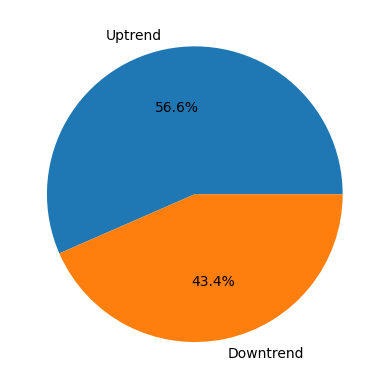

In [14]:
plt.pie(data['Target'].value_counts().values, labels=['Uptrend', 'Downtrend'], autopct='%1.1f%%')
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)

column_names = data.columns.tolist()
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=column_names)

In [25]:
data

,Close,Previous,Tomorrow,Diff,Target,US1Y,EURUSD,UNRATE,OIL,GOLD,VIX
0,0.200737,0.201970,0.202690,0.394702,1.0,1.000000,0.084496,0.053571,0.388312,0.010465,0.116247
1,0.202690,0.200737,0.203863,0.353532,1.0,0.995169,0.078553,0.053571,0.386672,0.012915,0.104691
2,0.203863,0.202690,0.202109,0.363627,0.0,0.988728,0.093411,0.035714,0.388203,0.012191,0.114072
3,0.202109,0.203863,0.199150,0.401424,0.0,0.988728,0.078295,0.035714,0.390499,0.011523,0.145207
4,0.199150,0.202109,0.199737,0.416981,1.0,0.990338,0.055814,0.035714,0.396786,0.010632,0.158396
...,...,...,...,...,...,...,...,...,...,...,...
5639,0.839804,0.838274,0.836169,0.359009,0.0,0.755233,0.336434,0.000000,0.594468,0.981352,0.108498
5640,0.836169,0.839804,0.842623,0.425720,1.0,0.779388,0.335401,0.000000,0.593101,0.964874,0.120326
5641,0.842623,0.836169,0.851092,0.295410,1.0,0.785829,0.330749,0.000000,0.603871,0.960588,0.105099
5642,0.851092,0.842623,0.853096,0.269385,1.0,0.801932,0.323773,0.000000,0.598568,0.947116,0.093950


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier

models = [RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1), 
          KNeighborsClassifier(n_neighbors=16), 
          DecisionTreeClassifier(random_state=1)]

models_name = ['Random Forest : \t', 'K-Neighbors : \t\t', 'Decision Tree : \t']

In [17]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [18]:
def backtest(data, models, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() # 0-2500..
        test = data.iloc[i:(i+step)].copy() # 2500-2750..
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [19]:
def score(pred):
  for i in range(len(pred)):
    p_score = "{:.3f}".format(precision_score(pred[i]['Target'], pred[i]['Predictions'])) 
    a_score = "{:.3f}".format(accuracy_score(pred[i]['Target'], pred[i]['Predictions'])) 
    r_score = "{:.3f}".format(recall_score(pred[i]['Target'], pred[i]['Predictions'])) 
    print(models_name[i], 'Precision Score : ', p_score, '\t', 'Accuracy Score : ', a_score, '\t', 'Recall Score : ', r_score)

<Axes: >

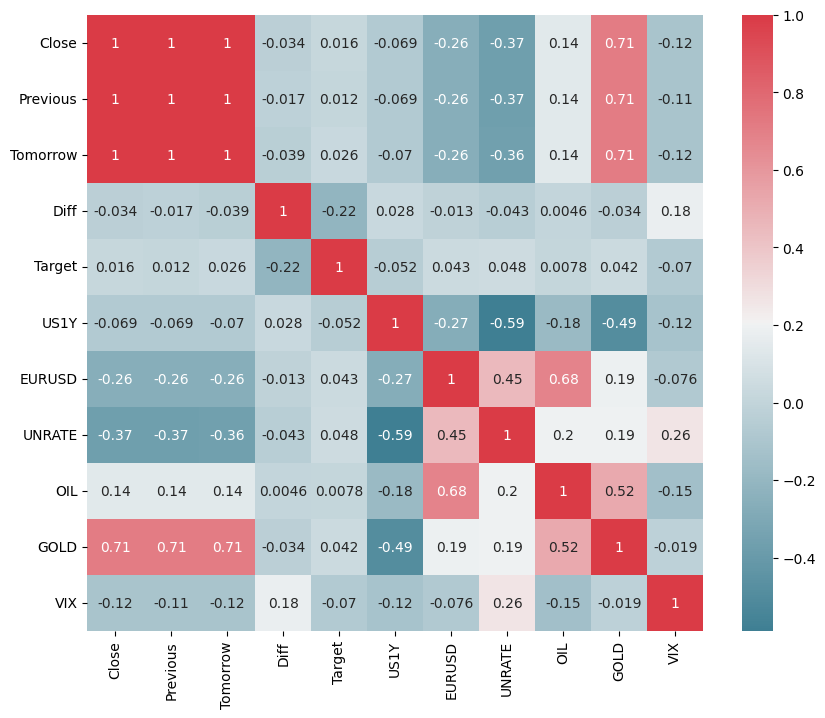

In [20]:
# Correlation
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [21]:
predictors = ['Close']
pred = []
for model in models:
  pred.append(backtest(data, models, predictors))
score(pred)

Random Forest : 	 Precision Score :  0.555 	 Accuracy Score :  0.448 	 Recall Score :  0.279
K-Neighbors : 		 Precision Score :  0.585 	 Accuracy Score :  0.476 	 Recall Score :  0.361
Decision Tree : 	 Precision Score :  0.545 	 Accuracy Score :  0.447 	 Recall Score :  0.330


In [22]:
predictors = ['Diff']
pred = []
for model in models:
  pred.append(backtest(data, models, predictors))
score(pred)

Random Forest : 	 Precision Score :  0.659 	 Accuracy Score :  0.569 	 Recall Score :  0.545
K-Neighbors : 		 Precision Score :  0.672 	 Accuracy Score :  0.579 	 Recall Score :  0.548
Decision Tree : 	 Precision Score :  0.629 	 Accuracy Score :  0.562 	 Recall Score :  0.611


In [23]:
predictors = ['Diff','GOLD','EURUSD','UNRATE','OIL','VIX','US1Y']
pred = []
for model in models:
  pred.append(backtest(data, models, predictors))
score(pred)

Random Forest : 	 Precision Score :  0.723 	 Accuracy Score :  0.553 	 Recall Score :  0.383
K-Neighbors : 		 Precision Score :  0.637 	 Accuracy Score :  0.508 	 Recall Score :  0.367
Decision Tree : 	 Precision Score :  0.604 	 Accuracy Score :  0.533 	 Recall Score :  0.586


Text(50.722222222222214, 0.5, 'Real')

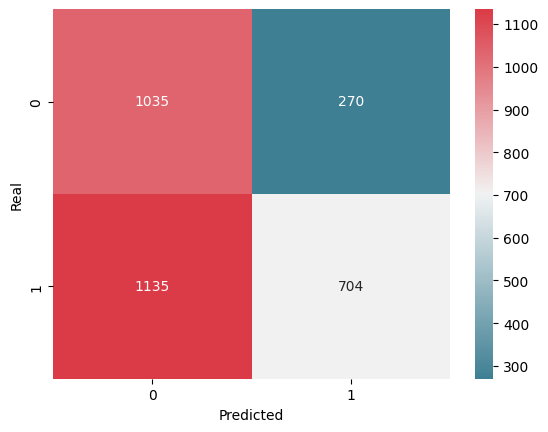

In [24]:
# Random Forest Confusion Matrix
cm = confusion_matrix(pred[0]['Target'], pred[0]['Predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('Real')